In [1]:
from _config import *

import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import colormaps
tab20 = colormaps['tab20']

In [2]:
df = pd.read_excel('data/macd.xlsx')
df.columns = df.columns.str.lower()

def color_condition(row):
    if row['macd'] >= 0:
        return 'red'
    else:
        return 'green'

df['color'] = df.apply(color_condition, axis=1)
df['i'] = df.index + 1

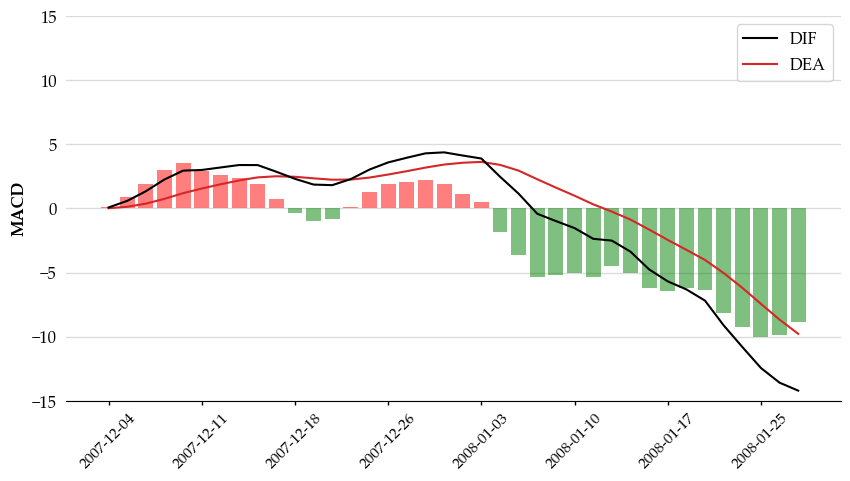

In [3]:
f, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df, x='i', y='dif', color = 'black', linewidth = 1.5, ax = ax, label = 'DIF', zorder = 10)
sns.lineplot(data = df, x='i', y='dea', color = tab20(6), linewidth = 1.5, ax = ax, label = 'DEA', zorder = 9)
plt.bar(df['i'], df['macd'], color = df['color'], label = 'MACD', alpha = 0.5, zorder = 8)

ax.set_xlabel(None)
# ax.xaxis.set_major_locator(MaxNLocator(nbins=12))
ax.set_xticks(df['i'][::5]) 
ax.set_xticklabels(df['date'][::5].dt.date, rotation = 45, fontsize = 11)

ax.set_ylabel('MACD', fontsize=12, fontweight='bold')
ax.set_ylim(-15, 15)

ax.grid(axis = 'y', color = 'lightgray', alpha = 0.8, zorder = 1, linewidth = 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left = False)

plt.show()